In [1]:
import numpy as np
from pathlib import Path, PurePath #manejo de rutas y archivos
import matplotlib.pyplot as plt #gráficos
from scipy.interpolate import griddata #interpolación

#Graficación
#plt.prop_cycle(color=['0C5DA5', '00B945', 'FF9500', 'FF2C00', '845B97'])
#Graficación
idioma = 'español'
#idioma = 'ingles'

if idioma == 'español':
    #plt.prop_cycle(color=['0C5DA5', '00B945', 'FF9500', 'FF2C00', '845B97'])
    #axes.prop_cycle : cycler('color', ['0C5DA5', '00B945', 'FF9500', 'FF2C00', '845B97', '474747', '9e9e9e'])
    #Latex y coma como separador decimal
    plt.rcParams['text.usetex'] = True #latex
    #plt.rc('text', usetex=False)
    plt.rcParams['axes.formatter.use_locale'] = True #formato de eje para la coma
    #se incluye paquete matematico útil, se corrige el error con el espacio y el espacio entre los números
    plt.rc('text.latex', preamble=r'\usepackage{pifont} \usepackage{amsmath} \DeclareUnicodeCharacter{202F}{\,} \usepackage{ziffer} \usepackage{siunitx}') 
    plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica"
    })
    import locale #líbreria para el formato
    locale.setlocale(locale.LC_ALL, "es_CR.utf8")

if idioma == 'ingles' :
    plt.rc('text.latex', preamble=r'\usepackage{pifont} \usepackage{amsmath} \usepackage{siunitx}')
    plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica"
    })

### Gráfico porcentaje de conversión
1. Dejar myfile y cor_2 con 33
3. Correr ox_conversion_todos_final_camara.sh para catalogar los datos y ordenarlos. Esto genera resultados_ordenados.txt
4. Correr la función grafico_ox
Está ajustado a tres anchos

In [2]:
def separar_datos_por_ancho(archivo, W0) :
    ruta_archivo = PurePath(Path(archivo)) #archivo txt
    pol, tor, w0, R = np.loadtxt(ruta_archivo, delimiter='\t', skiprows=1, usecols=(0, 1, 2, 3), unpack=True )
    
    #Identifica índice que cumple R < 1
    indices = np.where( (R<1) & (W0 == w0) )
    indices_1 = np.where( (R<1) ) 
    #Nuevas matrices
    pol = pol[indices]
    R = R[indices]
    tor = tor[indices]
    w0 = w0[indices_1]
    return pol, tor, R, w0

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25]),)
(26,)
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25]),)
(26,)
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25]),)
(26,)
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25]),)
(26,)
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25]),)
(26,)
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25]),)
(26,)
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25]),)
(26,)
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 2

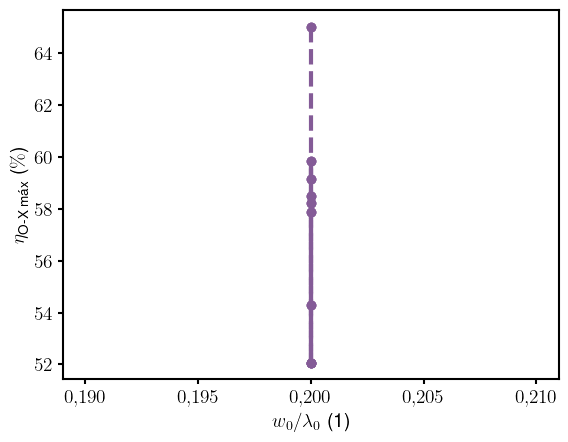

In [3]:
#grafico de tau vs ancho
def tau_vs_ancho(ruta, color, r) : 
    import os #manejo de archivos
    tau = []
    w0_total = []
    tor_total = [] 
    archivos_PC = os.listdir(ruta) #directorio con archivos de porcentaje de conversión
    archivos_PC.sort() #acomoda en órden alfabético
    for iArchivo in archivos_PC:
        #se obtiene la ruta del archivo
        ruta_archivo = PurePath(Path(ruta), Path(iArchivo))
        pol, tor, w0, R = np.loadtxt(ruta_archivo, delimiter='\t', skiprows=1, usecols=(0, 1, 2, 3), unpack=True)
        for i in range(0,3) :
            #Identifica índices que cumplen la condición R < 1
            indices = np.where( (w0[i] == w0) )
            print(indices)
            if np.any(indices) == False : #chequear matriz vacía en numpy
                print("matriz vacía")
                pass
            else: 
                pol1 = pol[indices]
                R1 = R[indices]
                tor1 = tor[indices]
                print(tor1.shape)
                T1 = (1-R1)*100
                tau.append(np.max(T1).tolist()) 
                tau_final = np.array(tau)
                w0_total.append(np.array(w0[i]).tolist())
                w0_total_final = np.array(w0_total)            
                tor_total.append(np.array(tor1[ np.where(T1 == np.max(T1)) ]).tolist())
                tor_total_final = np.array(tor_total)
    #gráfico
    #plt.plot(w0_inter, tau_inter, 'o--', linewidth=3, color= color, label = 'datos originales')
    if r==2 :
        plt.plot(w0_total_final[:-1], tau_final[:-1], 'o--', linewidth=3, color= color, label = 'datos originales')
    else:
        plt.plot(w0_total_final, tau_final, 'o--', linewidth=3, color= color, label = 'datos originales')
    plt.xlabel(r'$w_0/\lambda_0$ (1)', fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
    plt.ylabel( r'$ \eta_{\text{O-X máx}}$ (\si{\percent})', fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
    plt.tick_params(axis='both', labelsize=14, width=1.5)
    #plt.legend((r'$n_e/n_{e corte} = \num{1.48}, \eta_{\text{O-X máx}} =\num{11.6}  $', r'$n_e/n_{e corte} = \num{1.85}, \eta_{\text{O-X máx}} =\num{12.6}$', r'$n_e/n_{e corte} = \num{2.14}, \eta_{\text{O-X máx}} =\num{13.0}$'), loc='lower right', fontsize=11,  ncol=1, fancybox=True, shadow=True)
    #plt.legend((r'$z = \SI{0.00}{\metre} $', r'$z = +\SI{0.03}{\metre} $', r'$z = -\SI{0.03}{\metre}$'), loc='lower right', fontsize=11,  ncol=1, fancybox=True, shadow=True)
    ax = plt.gca() #https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.gca.html
    #plt.ylim(0,14, 1.5)
    plt.setp(ax.spines.values(), linewidth=1.5)
    
    print(tau_final, w0_total_final, tor_total)

#ruta, color redondeo (cantidad de decimales)
tau_vs_ancho('eta', '#845B97', 1)
#plt.savefig('tau_vs_ancho.png', dpi=300, bbox_inches='tight')

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25.] [0.501445 0.502181 0.502838 0.50343  0.503984 0.504577 0.505195 0.505897
 0.50664  0.50742  0.508228 0.508841 0.509125 0.508948 0.508202 0.506582
 0.503695 0.499238 0.492421 0.482568 0.469245 0.452263 0.431681 0.407553
 0.379977 0.349747]
El tau maximo es 50.91250000000001 con el ángulo [12.]
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25.] [0.512843 0.51439  0.516741 0.51992  0.523905 0.528721 0.534344 0.540686
 0.547618 0.554956 0.562302 0.569273 0.575441 0.580333 0.583635 0.585004
 0.584337 0.581306 0.575521 0.566395 0.553244 0.535867 0.513881 0.486929
 0.454643 0.417806]
El tau maximo es 58.5004 con el ángulo [15.]
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25.] [0.521548 0.523521 0.526819 0.531454 0.537396 0.544596 0.552975 0.562425
 0.572711 0.583498 0.594391 

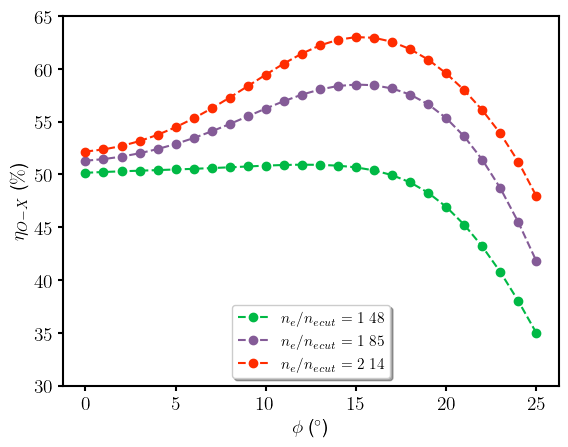

In [5]:
#grafico de tau vs toroidal
def tau_vs_toroidal(ruta, iArchivo,color) : 
    import os #manejo de archivos
    tau = []
    w0_total = []
    tor_total = [] 
    archivos_PC = os.listdir(ruta) #directorio con archivos de porcentaje de conversión
    archivos_PC.sort() #acomoda en órden alfabético
    ruta_archivo = PurePath(Path(ruta), Path(iArchivo))
    pol, tor, w0, R = np.loadtxt(ruta_archivo, delimiter='\t', skiprows=1, usecols=(0, 1, 2, 3), unpack=True)
    tor_final = np.linspace(0, 24, 24)
    print(tor, R)
    
    #Interpolación 1D
    from scipy.interpolate import UnivariateSpline
    spl = UnivariateSpline(tor[5:], R[5:])
    new_R = spl(tor_final)
    T1 = (1-new_R)*100
    #print("El tau maximo es", np.max(T1), "con el ángulo", tor_final[ np.where(new_R == np.max(new_R)) ] )
    print("El tau maximo es", np.max(R)*100, "con el ángulo", tor[ np.where(R == np.max(R)) ] )
    #plt.plot(tor[5:], R[5:]*100, '--o', color = color)
    #plt.plot(tor_final, T1, '--o', color = color)
    plt.plot(tor, (R)*100, '--o', color = color)
    plt.xlabel(r'$\phi$ (\si{\degree})', fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
    plt.ylabel( r'$ \eta_{O-X}$ (\si{\percent})', fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
    plt.tick_params(axis='both', labelsize=14, width=1.5)
    #plt.legend((r'$n_e/n_{e corte} = \num{1.48} \hspace{1cm} \eta_{\text{O-X máx}} =\num{61.0}  $', r'$n_e/n_{e corte} = \num{1.85} \hspace{1cm} \eta_{\text{O-X máx}} =\num{61.7}$', r'$n_e/n_{e corte} = \num{2.14} \hspace{1cm} \eta_{\text{O-X máx}} =\SI{63.0}{\percent}$'), 
               #loc='lower center', fontsize=11,  ncol=1, fancybox=True, shadow=True)
    #plt.legend((r'$n_e/n_{e corte} = \num{1.48}$', r'$n_e/n_{e corte} = \num{1.85}$', r'$n_e/n_{e corte} = \num{2.14} $'), 
               #loc='lower center', fontsize=11,  ncol=1, fancybox=True, shadow=True)
    plt.legend((r'$n_e/n_{ecut} = \num{1.48}$', r'$n_e/n_{ecut} = \num{1.85}$', r'$n_e/n_{ecut} = \num{2.14} $'), 
               loc='lower center', fontsize=11,  ncol=1, fancybox=True, shadow=True)
    ax = plt.gca() #https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.gca.html
    plt.ylim(30, 65, 10.3)
    plt.setp(ax.spines.values(), linewidth=1.5)

#Chequear que alcanzan el estado estacionario en distintos tiempos.
#Por la dependencia debería verse esta tendencia. 
#18 oscilaciones

#tau_vs_toroidal('eta', 'resultado148.txt', '#00B945')
#tau_vs_toroidal('eta', 'resultado185.txt', '#845B97')
#tau_vs_toroidal('eta', 'resultado214.txt', '#FF2C00')

tau_vs_toroidal('eta', '148.txt', '#00B945')
tau_vs_toroidal('eta', '185.txt', '#845B97')
tau_vs_toroidal('eta', '214.txt', '#FF2C00')

#tau_vs_toroidal('eta', 'resultados_n148.txt', '#00B945')
#tau_vs_toroidal('eta', 'resultados_n185.txt', '#845B97')
#tau_vs_toroidal('eta', 'resultados_n214.txt', '#FF2C00')
#plt.savefig('eta_vs_phi_camara.eps', format='eps', dpi=300, bbox_inches='tight') #paper IOP
plt.savefig('eta_vs_phi_camara.png', dpi=300, bbox_inches='tight')

El tau maximo es 57.6952 con el ángulo [20.] y el índice [0.9]


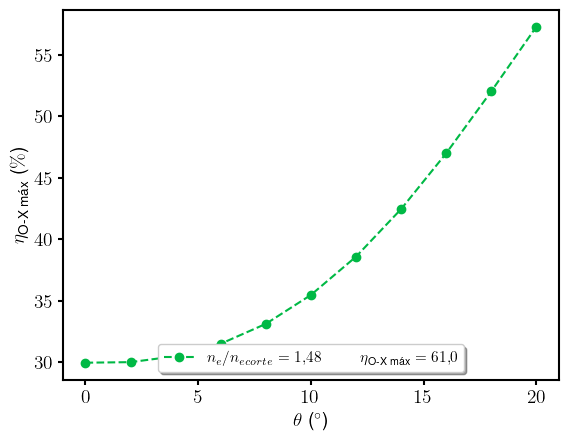

In [46]:
#grafico de tau vs toroidal
def tau_vs_poloidal(ruta, iArchivo,color, ancho) : 
    import os #manejo de archivos
    tau = []
    w0_total = []
    tor_total = [] 
    archivos_PC = os.listdir(ruta) #directorio con archivos de porcentaje de conversión
    archivos_PC.sort() #acomoda en órden alfabético
    ruta_archivo = PurePath(Path(ruta), Path(iArchivo))
    pol, tor, w0, R = np.loadtxt(ruta_archivo, delimiter='\t', skiprows=1, usecols=(0, 1, 2, 3), unpack=True)
    pol_final = np.linspace(-20, 20, 40)
    #print(pol[np.where(w0 == 0.2)], 1-R[np.where(w0 == 0.2)])
    
    #Interpolación 1D
    from scipy.interpolate import UnivariateSpline
    spl = UnivariateSpline(pol, R)
    new_R = spl(pol_final)
    T1 = (1-new_R)*100
    #print("El tau maximo es", np.max(T1), "con el ángulo", tor_final[ np.where(new_R == np.max(new_R)) ] )
    abc =(1-R)*100
    print("El tau maximo es", np.max(abc), "con el ángulo", pol[ np.where(abc == np.max(abc)) ], "y el índice",
         w0[np.where(abc == np.max(abc))])
    #plt.plot(tor[5:], R[5:]*100, '--o', color = color)
    #plt.plot(tor_final, T1, '--o', color = color)
    total = 100*(1-R[np.where(w0 == ancho)])
    pol_final = pol[np.where(w0 == ancho)]
    plt.plot(pol_final[10:], total[10:], '--o', color = color)
    plt.xlabel(r'$\theta$ (\si{\degree})', fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
    plt.ylabel( r'$ \eta_{\text{O-X máx}}$ (\si{\percent})', fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
    plt.tick_params(axis='both', labelsize=14, width=1.5)
    plt.legend((r'$n_e/n_{e corte} = \num{1.48} \hspace{1cm} \eta_{\text{O-X máx}} =\num{61.0}  $', r'$n_e/n_{e corte} = \num{1.85} \hspace{1cm} \eta_{\text{O-X máx}} =\num{61.7}$', r'$n_e/n_{e corte} = \num{2.14} \hspace{1cm} \eta_{\text{O-X máx}} =\SI{63.0}{\percent}$'), 
               loc='lower center', fontsize=11,  ncol=1, fancybox=True, shadow=True)
    ax = plt.gca() #https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.gca.html
    #plt.ylim(43,64, 1.5)
    plt.setp(ax.spines.values(), linewidth=1.5)
    plt.show()
tau_vs_poloidal('z=0n2.140_90', 'resultados_ancho_total_020304.txt', '#00B945', 1.0)